In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked wieght', 'Viscera weight', 'Shell wieght', 'Age']
)

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked wieght,Viscera weight,Shell wieght,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [4]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [5]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1),
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [6]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 638us/step - loss: 87.3252
Epoch 2/10
104/104 [==============================] - 0s 555us/step - loss: 16.3958
Epoch 3/10
104/104 [==============================] - 0s 532us/step - loss: 9.2370
Epoch 4/10
104/104 [==============================] - 0s 526us/step - loss: 8.2449
Epoch 5/10
104/104 [==============================] - 0s 518us/step - loss: 7.7916
Epoch 6/10
104/104 [==============================] - 0s 519us/step - loss: 7.5072
Epoch 7/10
104/104 [==============================] - 0s 554us/step - loss: 6.9682
Epoch 8/10
104/104 [==============================] - 0s 512us/step - loss: 7.0687
Epoch 9/10
104/104 [==============================] - 0s 566us/step - loss: 6.7632
Epoch 10/10
104/104 [==============================] - 0s 529us/step - loss: 6.5526


In [7]:
normalize = preprocessing.Normalization()

In [8]:
normalize.adapt(abalone_features)

In [9]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 647us/step - loss: 102.0244
Epoch 2/10
104/104 [==============================] - 0s 522us/step - loss: 68.2818
Epoch 3/10
104/104 [==============================] - 0s 542us/step - loss: 24.8431
Epoch 4/10
104/104 [==============================] - 0s 538us/step - loss: 6.5281
Epoch 5/10
104/104 [==============================] - 0s 534us/step - loss: 4.9015
Epoch 6/10
104/104 [==============================] - 0s 504us/step - loss: 4.5869
Epoch 7/10
104/104 [==============================] - 0s 526us/step - loss: 5.0797
Epoch 8/10
104/104 [==============================] - 0s 570us/step - loss: 4.9427
Epoch 9/10
104/104 [==============================] - 0s 562us/step - loss: 4.7864
Epoch 10/10
104/104 [==============================] - 0s 534us/step - loss: 4.4566


In [10]:
titanic = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [12]:
input = tf.keras.Input(shape=(), dtype=tf.float32)

result = 2*input + 1
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [13]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [14]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [15]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
        
    inputs[name] = tf.keras.Input(shape=(1, ), name=name, dtype=dtype)
inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [16]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = preprocessing.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [17]:
preprocessed_inputs = [all_numeric_inputs]

In [18]:
for name, input in inputs.items():
    if input.dtype==tf.float32:
        continue
    lookup = preprocessing.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = preprocessing.CategoryEncoding(max_tokens=lookup.vocab_size())
    
    x=lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

In [21]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
tf.keras.utils.plot_model(model = titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

"dot" with args ['-Tps', 'C:\\Users\\June\\AppData\\Local\\Temp\\tmphcrmtu8c'] returned code: 1

stdout, stderr:
 b''
b'Format: "ps" not recognized. Use one of:\r\n'



AssertionError: 1

In [23]:
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}

In [27]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]], dtype=float32)>

In [30]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])
    
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)
    
    model.compile(loss = tf.losses.BinaryCrossentropy(from_logits=True),
                  optimizer = tf.optimizers.Adam())
    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [31]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 1ms/step - loss: 0.7498
Epoch 2/10
20/20 [==============================] - 0s 892us/step - loss: 0.5655
Epoch 3/10
20/20 [==============================] - 0s 840us/step - loss: 0.5281
Epoch 4/10
20/20 [==============================] - 0s 893us/step - loss: 0.4499
Epoch 5/10
20/20 [==============================] - 0s 840us/step - loss: 0.4430
Epoch 6/10
20/20 [==============================] - 0s 908us/step - loss: 0.4219
Epoch 7/10
20/20 [==============================] - 0s 892us/step - loss: 0.4057
Epoch 8/10
20/20 [==============================] - 0s 911us/step - loss: 0.4375
Epoch 9/10
20/20 [==============================] - 0s 854us/step - loss: 0.4000
Epoch 10/10
20/20 [==============================] - 0s 840us/step - loss: 0.4328


In [32]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test\assets


In [33]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.872]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.872]], shape=(1, 1), dtype=float32)


In [37]:
import itertools
def slices(features):
    for i in itertools.count():
        example = {name:values[i] for name,values in features.items()}
        yield example

In [41]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [47]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [49]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [50]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4220
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4211
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4190


In [51]:
titanic_file_path = tf.keras.utils.get_file('train.csv', 'https://storage.googleapis.com/tf-datasets/titanic/train.csv')

32768/30874 [===============================] - 0s 0us/step


In [52]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size = 5,
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,
)

In [54]:
for batch, label in titanic_csv_ds.take(1):
    for key,value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'male' b'female' b'male']
age                 : [52. 46. 59. 25. 19.]
n_siblings_spouses  : [1 1 0 1 0]
parch               : [0 0 0 2 0]
fare                : [ 78.267  61.175  13.5   151.55   10.5  ]
class               : [b'First' b'First' b'Second' b'First' b'Second']
deck                : [b'D' b'E' b'unknown' b'C' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'n' b'y' b'n' b'y']

label               : [1 0 0 0 0]


In [68]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic'
)

In [72]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type='GZIP'
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [282.92 272.37 258.45 271.86 273.42]
rain_1h             : [0.42 0.   0.   0.   0.  ]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [92 90 20 90 40]
weather_main        : [b'Rain' b'Clouds' b'Clouds' b'Mist' b'Clouds']
weather_description : [b'heavy intensity rain' b'overcast clouds' b'few clouds' b'mist'
 b'scattered clouds']
date_time           : [b'2013-10-15 17:00:00' b'2013-04-11 06:00:00' b'2013-01-13 22:00:00'
 b'2013-04-20 09:00:00' b'2013-04-21 23:00:00']

label               : [6237 3973 1274 3745  960]


In [73]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 ==0:
        print('.', end='')
print()

...............................................................................................
Wall time: 5.96 s


In [74]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 ==0 :
        print('.', end='')
print()

...............................................................................................
Wall time: 914 ms


In [75]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
Wall time: 1.25 s


In [76]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip', "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True
)

160317440/160313983 [==============================] - 14s 0us/step


In [78]:
import pathlib
font_csvs = sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts\\AGENCY.csv',
 'fonts\\ARIAL.csv',
 'fonts\\BAITI.csv',
 'fonts\\BANKGOTHIC.csv',
 'fonts\\BASKERVILLE.csv',
 'fonts\\BAUHAUS.csv',
 'fonts\\BELL.csv',
 'fonts\\BERLIN.csv',
 'fonts\\BERNARD.csv',
 'fonts\\BITSTREAMVERA.csv']

In [79]:
len(font_csvs)

153

In [80]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = 'fonts/*.csv',
    batch_size = 10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size = 10000
)

In [81]:
for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i>15:
            break
        print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'COMMERCIALSCRIPT' b'FREESTYLE' b'NIRMALA' b'HARRINGTON' b'FORTE'
 b'FREESTYLE' b'BROADWAY' b'NIRMALA' b'BROADWAY' b'FORTE']
fontVariant         : [b'COMMERCIALSCRIPT BT' b'FREESTYLE SCRIPT' b'NIRMALA UI SEMILIGHT'
 b'HARRINGTON' b'FORTE' b'FREESTYLE SCRIPT' b'BROADWAY'
 b'NIRMALA UI SEMILIGHT' b'BROADWAY' b'FORTE']
m_label             : [ 190  235 3405  213  235  220  305 3455 8734  710]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 1 0 0 1 0 0 0 1 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [47 42 24 25 32 21 45 27 45 32]
m_left              : [20 19 23 23 24 21 24 23 25 29]
originalH           : [31 32 65 59 47 56 36 66 29  9]
originalW           : [48 35 35 39 44 43 16 77 51 20]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1   1   1   1 255   1   1   1]
r0c1                : [  1   1   1

In [82]:
import re

def make_images(features):
    image=[None]*400
    new_feats = {}
    
    for name, value in features.items():
        match = re.match('r(\d+)c(\d+)', name)
        if match:
            image[int(match.group(1))*20 + int(match.group(2))] = value
        else:
            new_feats[name] = value
            
    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20,20,-1])
    new_feats['image'] = image
    
    return new_feats

In [83]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

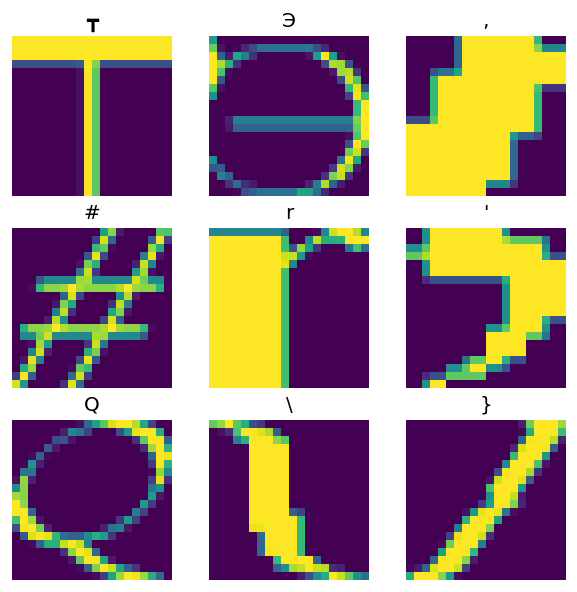

In [84]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
    plt.subplot(3,3,n+1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')

In [85]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [86]:
features = tf.io.decode_csv(lines, record_defaults = all_strings)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [98]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [99]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [100]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [101]:
def decode_titanic_line(line):
    return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    tf.data.TextLineDataset(titanic_file_path)
    .skip(1)
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [110]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [111]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()] * (num_font_features-2)

In [112]:
font_csvs[0]

'fonts\\AGENCY.csv'

In [113]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults = font_column_types,
    header = True
)

In [114]:
for row in simple_font_ds.take(10):
    print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [115]:
font_files = tf.data.Dataset.list_files('fonts/*.csv')

In [117]:
print('Epoch 1:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts\\FELIX TITLING.csv'
     b'fonts\\NIAGARA.csv'
     b'fonts\\TAI.csv'
     b'fonts\\ROMAN.csv'
     b'fonts\\BITSTREAMVERA.csv'
    ...

Epoch 2:
     b'fonts\\EBRIMA.csv'
     b'fonts\\SWIS721.csv'
     b'fonts\\QUICKTYPE.csv'
     b'fonts\\BRITANNIC.csv'
     b'fonts\\CENTAUR.csv'
    ...


In [118]:
def make_font_csv_ds(path):
    return tf.data.experimental.CsvDataset(
        path,
        record_defaults=font_column_types,
        header=True
    )

In [120]:
font_rows = font_files.interleave(make_font_csv_ds, cycle_length=3)

In [121]:
fonts_dict = {'font_name':[], 'character': []}

for row in font_rows.take(10):
    fonts_dict['font_name'].append(row[0].numpy().decode())
    fonts_dict['character'].append(chr(row[2].numpy()))
    
pd.DataFrame(fonts_dict)

,font_name,character
0,MONEY,2
1,STYLUS,
2,KRISTEN,ﬂ
3,MONEY,2
4,STYLUS,
5,KRISTEN,ﬁ
6,MONEY,0
7,STYLUS,
8,KRISTEN,
9,MONEY,8


In [122]:
BATCH_SIZE = 2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = 'fonts/*.csv',
    batch_size = BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100
)

In [123]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
    print('.', end='')
print()

....................
Wall time: 9.7 s


In [125]:
fonts_files = tf.data.Dataset.list_files('fonts/*.csv')
fonts_lines = fonts_files.interleave(
    lambda fname: tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [126]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
    print('.', end='')
print()

....................
Wall time: 4.02 s


In [140]:
numeric_inputs.keys()

dict_keys(['age', 'n_siblings_spouses', 'parch', 'fare'])

In [157]:
titanic_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
alone (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
class (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
deck (InputLayer)               [(None, 1)]          0                                            
____________________________________________________________________________________________